# Goal of workbook is to learn about time series forecasting
### Taking a "ice cream" shop approach: sampling many different flavors
working from [https://otexts.com/fpp3/index.html](Hyndamn's Forecasting Principles and Practice)
goal is to also work through [SKforecast](https://cienciadedatos.net/documentos/py27-time-series-forecasting-python-scikitlearn)
and [SciKitLearn](https://scikit-learn.org/stable/)

## Section 1: Get some Data
### SPP Day Ahead LMPs
example [Gridstatus LMP Data](https://docs.gridstatus.io/en/latest/Examples/spp/LMP%20Data.html)

In [1]:
import pandas as pd

In [2]:
import gridstatus

C:\Users\U1231034\AppData\Local\anaconda3\envs\learn\Lib\site-packages\requests\__init__.py:86: RequestsDependencyWarning: Unable to find acceptable character detection dependency (chardet or charset_normalizer).
  warnings.warn(


In [3]:
iso = gridstatus.SPP()

Coal Units and Wind Units for a variety of pricing, wind units should have more negative prices

In [5]:
locations = [
"WR.LEC.5",
"WR.JEC.1",
"KCPLIATANUNIAT1",
"KCPLLACYGNEUNLAC1",
"MPS.ROCKCREEK",
"SECI_CIMARRON",
"SECI.KCPS.SPEARVILLE"]

Pull three years of data to start

In [7]:
df_main=iso.get_lmp(date="2023-01-01", end = "2024-01-01", market="DAY_AHEAD_HOURLY")

  1%|▍                                                                                 | 2/365 [00:16<50:42,  8.38s/it]


KeyboardInterrupt: 

In [11]:
#df_21=iso.get_lmp(date="2021-01-01",market="DAY_AHEAD_HOURLY")

HTTPError: HTTP Error 404: 

In [9]:
df_main=df_main.loc[df_main['Location'].isin(locations)]

In [10]:
df_main.head()

,Time,Interval Start,Interval End,Market,Location,Location Type,PNode,LMP,Energy,Congestion,Loss
262,2023-01-01 00:00:00-06:00,2023-01-01 00:00:00-06:00,2023-01-01 01:00:00-06:00,DAY_AHEAD_HOURLY,KCPLIATANUNIAT1,Settlement Location,KCPLIATANUNIAT1_RA,23.1615,21.8780,1.0943,0.1892
264,2023-01-01 00:00:00-06:00,2023-01-01 00:00:00-06:00,2023-01-01 01:00:00-06:00,DAY_AHEAD_HOURLY,KCPLLACYGNEUNLAC1,Settlement Location,KCPLLACYGNEUNLAC1_RA,22.2436,21.8779,0.9072,-0.5415
364,2023-01-01 00:00:00-06:00,2023-01-01 00:00:00-06:00,2023-01-01 01:00:00-06:00,DAY_AHEAD_HOURLY,MPS.ROCKCREEK,Settlement Location,MPSROCKCK7UNMPS_ROCKCREEK_RA,22.8559,21.8779,0.7961,0.1819
688,2023-01-01 00:00:00-06:00,2023-01-01 00:00:00-06:00,2023-01-01 01:00:00-06:00,DAY_AHEAD_HOURLY,SECI.KCPS.SPEARVILLE,Settlement Location,SECISPERVI1UNWINDFARM_RA,18.0405,21.8780,-1.8147,-2.0228
714,2023-01-01 00:00:00-06:00,2023-01-01 00:00:00-06:00,2023-01-01 01:00:00-06:00,DAY_AHEAD_HOURLY,SECI_CIMARRON,Settlement Location,SECIBUCKNER7UNCIMRNCPV_WIND_RA,17.3592,21.8780,-2.4592,-2.0596


In [14]:
df_main.tail()

,Time,Interval Start,Interval End,Market,Location,Location Type,PNode,LMP,Energy,Congestion,Loss
10136502,2023-12-30 23:00:00-06:00,2023-12-30 23:00:00-06:00,2023-12-31 00:00:00-06:00,DAY_AHEAD_HOURLY,WR.JEC.1,Settlement Location,WRJEFFUN10_RA,16.8548,20.3266,-1.7875,-1.6843
10136503,2023-12-30 23:00:00-06:00,2023-12-30 23:00:00-06:00,2023-12-31 00:00:00-06:00,DAY_AHEAD_HOURLY,WR.JEC.2,Settlement Location,WRJEFFUN11_RA,16.9249,20.3266,-1.7697,-1.6320
10136504,2023-12-30 23:00:00-06:00,2023-12-30 23:00:00-06:00,2023-12-31 00:00:00-06:00,DAY_AHEAD_HOURLY,WR.JEC.3,Settlement Location,WRJEFFUN12_RA,17.0066,20.3266,-1.7697,-1.5503
10136508,2023-12-30 23:00:00-06:00,2023-12-30 23:00:00-06:00,2023-12-31 00:00:00-06:00,DAY_AHEAD_HOURLY,WR.LEC.4,Settlement Location,WRLECUN26_RA,18.0041,20.3266,-1.0124,-1.3101
10136509,2023-12-30 23:00:00-06:00,2023-12-30 23:00:00-06:00,2023-12-31 00:00:00-06:00,DAY_AHEAD_HOURLY,WR.LEC.5,Settlement Location,WRLECUN27_RA,18.0399,20.3266,-1.0852,-1.2015


In [21]:
df_main.reset_index(drop=True)

,Time,Interval Start,Interval End,Market,Location,Location Type,PNode,LMP,Energy,Congestion,Loss
0,2023-01-01 00:00:00-06:00,2023-01-01 00:00:00-06:00,2023-01-01 01:00:00-06:00,DAY_AHEAD_HOURLY,KCPLIATANUNIAT1,Settlement Location,KCPLIATANUNIAT1_RA,23.1615,21.8780,1.0943,0.1892
1,2023-01-01 00:00:00-06:00,2023-01-01 00:00:00-06:00,2023-01-01 01:00:00-06:00,DAY_AHEAD_HOURLY,KCPLIATANUNIAT2,Settlement Location,KCPLIATANUNIAT2_RA,23.1615,21.8780,1.0943,0.1892
2,2023-01-01 00:00:00-06:00,2023-01-01 00:00:00-06:00,2023-01-01 01:00:00-06:00,DAY_AHEAD_HOURLY,KCPLLACYGNEUNLAC1,Settlement Location,KCPLLACYGNEUNLAC1_RA,22.2436,21.8779,0.9072,-0.5415
3,2023-01-01 00:00:00-06:00,2023-01-01 00:00:00-06:00,2023-01-01 01:00:00-06:00,DAY_AHEAD_HOURLY,KCPLLACYGNEUNLAC2,Settlement Location,KCPLLACYGNEUNLAC2_RA,22.2436,21.8779,0.9072,-0.5415
4,2023-01-01 00:00:00-06:00,2023-01-01 00:00:00-06:00,2023-01-01 01:00:00-06:00,DAY_AHEAD_HOURLY,MPS.ROCKCREEK,Settlement Location,MPSROCKCK7UNMPS_ROCKCREEK_RA,22.8559,21.8779,0.7961,0.1819
...,...,...,...,...,...,...,...,...,...,...,...
113875,2023-12-31 23:00:00-06:00,2023-12-31 23:00:00-06:00,2024-01-01 00:00:00-06:00,DAY_AHEAD_HOURLY,WR.JEC.1,Settlement Location,WRJEFFUN10_RA,22.7419,24.3676,-0.2734,-1.3523
113876,2023-12-31 23:00:00-06:00,2023-12-31 23:00:00-06:00,2024-01-01 00:00:00-06:00,DAY_AHEAD_HOURLY,WR.JEC.2,Settlement Location,WRJEFFUN11_RA,22.8056,24.3677,-0.2707,-1.2914
113877,2023-12-31 23:00:00-06:00,2023-12-31 23:00:00-06:00,2024-01-01 00:00:00-06:00,DAY_AHEAD_HOURLY,WR.JEC.3,Settlement Location,WRJEFFUN12_RA,22.9064,24.3677,-0.2707,-1.1906
113878,2023-12-31 23:00:00-06:00,2023-12-31 23:00:00-06:00,2024-01-01 00:00:00-06:00,DAY_AHEAD_HOURLY,WR.LEC.4,Settlement Location,WRLECUN26_RA,23.1310,24.3677,-0.2206,-1.0161


In [23]:
df_main.drop(columns=["Interval Start", "Interval End", "Market", "Location Type", "PNode", "Energy", "Congestion", "Loss"], inplace=True)

In [27]:
df_main.shape

(113880, 3)

In [28]:
df_main.head(30)

,Time,Location,LMP
262,2023-01-01 00:00:00-06:00,KCPLIATANUNIAT1,23.1615
263,2023-01-01 00:00:00-06:00,KCPLIATANUNIAT2,23.1615
264,2023-01-01 00:00:00-06:00,KCPLLACYGNEUNLAC1,22.2436
265,2023-01-01 00:00:00-06:00,KCPLLACYGNEUNLAC2,22.2436
364,2023-01-01 00:00:00-06:00,MPS.ROCKCREEK,22.8559
687,2023-01-01 00:00:00-06:00,SECI.KCPS.CIMARRON,17.3592
688,2023-01-01 00:00:00-06:00,SECI.KCPS.SPEARVILLE,18.0405
714,2023-01-01 00:00:00-06:00,SECI_CIMARRON,17.3592
1051,2023-01-01 00:00:00-06:00,WR.JEC.1,17.6536
1052,2023-01-01 00:00:00-06:00,WR.JEC.2,17.0317


In [29]:
df_main.tail(30)

,Time,Location,LMP
26210,2023-12-31 21:00:00-06:00,WR.JEC.2,23.6966
26211,2023-12-31 21:00:00-06:00,WR.JEC.3,23.8023
26215,2023-12-31 21:00:00-06:00,WR.LEC.4,24.2121
26216,2023-12-31 21:00:00-06:00,WR.LEC.5,24.2862
26590,2023-12-31 22:00:00-06:00,KCPLIATANUNIAT1,26.5195
26591,2023-12-31 22:00:00-06:00,KCPLIATANUNIAT2,26.5195
26592,2023-12-31 22:00:00-06:00,KCPLLACYGNEUNLAC1,25.5493
26593,2023-12-31 22:00:00-06:00,KCPLLACYGNEUNLAC2,25.5493
26691,2023-12-31 22:00:00-06:00,MPS.ROCKCREEK,26.4230
27030,2023-12-31 22:00:00-06:00,SECI.KCPS.CIMARRON,25.4710


In [30]:
df_main.reset_index(drop=True)

,Time,Location,LMP
0,2023-01-01 00:00:00-06:00,KCPLIATANUNIAT1,23.1615
1,2023-01-01 00:00:00-06:00,KCPLIATANUNIAT2,23.1615
2,2023-01-01 00:00:00-06:00,KCPLLACYGNEUNLAC1,22.2436
3,2023-01-01 00:00:00-06:00,KCPLLACYGNEUNLAC2,22.2436
4,2023-01-01 00:00:00-06:00,MPS.ROCKCREEK,22.8559
...,...,...,...
113875,2023-12-31 23:00:00-06:00,WR.JEC.1,22.7419
113876,2023-12-31 23:00:00-06:00,WR.JEC.2,22.8056
113877,2023-12-31 23:00:00-06:00,WR.JEC.3,22.9064
113878,2023-12-31 23:00:00-06:00,WR.LEC.4,23.1310


In [47]:
df_mainPivot = df_main.pivot(index = "Time", columns = "Location", values="LMP")

In [48]:
df_mainPivot.head()

Location,KCPLIATANUNIAT1,KCPLIATANUNIAT2,KCPLLACYGNEUNLAC1,KCPLLACYGNEUNLAC2,MPS.ROCKCREEK,SECI.KCPS.CIMARRON,SECI.KCPS.SPEARVILLE,SECI_CIMARRON,WR.JEC.1,WR.JEC.2,WR.JEC.3,WR.LEC.4,WR.LEC.5
Time,,,,,,,,,,,,,
2023-01-01 00:00:00-06:00,23.1615,23.1615,22.2436,22.2436,22.8559,17.3592,18.0405,17.3592,17.6536,17.0317,17.1019,24.3936,24.0183
2023-01-01 01:00:00-06:00,20.5651,20.5651,19.7729,19.7729,20.4925,17.1675,17.3628,17.1675,17.5015,17.2527,17.3181,20.9549,20.8391
2023-01-01 02:00:00-06:00,22.1197,22.1197,21.1474,21.1474,21.9965,18.5753,18.7383,18.5753,17.5991,17.1104,17.1791,23.0484,22.7795
2023-01-01 03:00:00-06:00,21.1908,21.1908,20.2595,20.2595,21.1168,18.0899,18.1809,18.0899,17.4774,17.1104,17.1787,21.9023,21.6705
2023-01-01 04:00:00-06:00,21.9438,21.9438,20.9770,20.9770,21.7675,18.7861,18.8693,18.7861,17.4918,17.0049,17.0748,22.8965,22.6176


In [50]:
df_mainPivot.reset_index()

Location,Time,KCPLIATANUNIAT1,KCPLIATANUNIAT2,KCPLLACYGNEUNLAC1,KCPLLACYGNEUNLAC2,MPS.ROCKCREEK,SECI.KCPS.CIMARRON,SECI.KCPS.SPEARVILLE,SECI_CIMARRON,WR.JEC.1,WR.JEC.2,WR.JEC.3,WR.LEC.4,WR.LEC.5
0,2023-01-01 00:00:00-06:00,23.1615,23.1615,22.2436,22.2436,22.8559,17.3592,18.0405,17.3592,17.6536,17.0317,17.1019,24.3936,24.0183
1,2023-01-01 01:00:00-06:00,20.5651,20.5651,19.7729,19.7729,20.4925,17.1675,17.3628,17.1675,17.5015,17.2527,17.3181,20.9549,20.8391
2,2023-01-01 02:00:00-06:00,22.1197,22.1197,21.1474,21.1474,21.9965,18.5753,18.7383,18.5753,17.5991,17.1104,17.1791,23.0484,22.7795
3,2023-01-01 03:00:00-06:00,21.1908,21.1908,20.2595,20.2595,21.1168,18.0899,18.1809,18.0899,17.4774,17.1104,17.1787,21.9023,21.6705
4,2023-01-01 04:00:00-06:00,21.9438,21.9438,20.9770,20.9770,21.7675,18.7861,18.8693,18.7861,17.4918,17.0049,17.0748,22.8965,22.6176
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2023-12-31 19:00:00-06:00,25.1442,25.1442,24.8819,24.8819,16.9229,22.7914,23.1359,22.7914,23.9770,24.0462,24.1494,24.7306,24.8162
8756,2023-12-31 20:00:00-06:00,25.0533,25.0533,24.5311,24.5311,24.7022,23.3450,23.6479,23.3450,23.8784,23.9503,24.0563,24.4739,24.5689
8757,2023-12-31 21:00:00-06:00,24.9286,24.9286,23.9259,23.9259,24.8643,23.3814,23.6222,23.3814,23.6232,23.6966,23.8023,24.2121,24.2862
8758,2023-12-31 22:00:00-06:00,26.5195,26.5195,25.5493,25.5493,26.4230,25.4710,25.6972,25.4710,25.2807,25.3562,25.4686,25.8145,25.9067


In [51]:
df_mainPivot.index

DatetimeIndex(['2023-01-01 00:00:00-06:00', '2023-01-01 01:00:00-06:00',
               '2023-01-01 02:00:00-06:00', '2023-01-01 03:00:00-06:00',
               '2023-01-01 04:00:00-06:00', '2023-01-01 05:00:00-06:00',
               '2023-01-01 06:00:00-06:00', '2023-01-01 07:00:00-06:00',
               '2023-01-01 08:00:00-06:00', '2023-01-01 09:00:00-06:00',
               ...
               '2023-12-31 14:00:00-06:00', '2023-12-31 15:00:00-06:00',
               '2023-12-31 16:00:00-06:00', '2023-12-31 17:00:00-06:00',
               '2023-12-31 18:00:00-06:00', '2023-12-31 19:00:00-06:00',
               '2023-12-31 20:00:00-06:00', '2023-12-31 21:00:00-06:00',
               '2023-12-31 22:00:00-06:00', '2023-12-31 23:00:00-06:00'],
              dtype='datetime64[ns, US/Central]', name='Time', length=8760, freq=None)

In [52]:
df_mainPivot.columns

Index(['KCPLIATANUNIAT1', 'KCPLIATANUNIAT2', 'KCPLLACYGNEUNLAC1',
       'KCPLLACYGNEUNLAC2', 'MPS.ROCKCREEK', 'SECI.KCPS.CIMARRON',
       'SECI.KCPS.SPEARVILLE', 'SECI_CIMARRON', 'WR.JEC.1', 'WR.JEC.2',
       'WR.JEC.3', 'WR.LEC.4', 'WR.LEC.5'],
      dtype='object', name='Location')

In [53]:
df_mainPivot.columns.name=''

In [54]:
df_mainPivot.head()

,KCPLIATANUNIAT1,KCPLIATANUNIAT2,KCPLLACYGNEUNLAC1,KCPLLACYGNEUNLAC2,MPS.ROCKCREEK,SECI.KCPS.CIMARRON,SECI.KCPS.SPEARVILLE,SECI_CIMARRON,WR.JEC.1,WR.JEC.2,WR.JEC.3,WR.LEC.4,WR.LEC.5
Time,,,,,,,,,,,,,
2023-01-01 00:00:00-06:00,23.1615,23.1615,22.2436,22.2436,22.8559,17.3592,18.0405,17.3592,17.6536,17.0317,17.1019,24.3936,24.0183
2023-01-01 01:00:00-06:00,20.5651,20.5651,19.7729,19.7729,20.4925,17.1675,17.3628,17.1675,17.5015,17.2527,17.3181,20.9549,20.8391
2023-01-01 02:00:00-06:00,22.1197,22.1197,21.1474,21.1474,21.9965,18.5753,18.7383,18.5753,17.5991,17.1104,17.1791,23.0484,22.7795
2023-01-01 03:00:00-06:00,21.1908,21.1908,20.2595,20.2595,21.1168,18.0899,18.1809,18.0899,17.4774,17.1104,17.1787,21.9023,21.6705
2023-01-01 04:00:00-06:00,21.9438,21.9438,20.9770,20.9770,21.7675,18.7861,18.8693,18.7861,17.4918,17.0049,17.0748,22.8965,22.6176


In [57]:
df_mainPivot.index

DatetimeIndex(['2023-01-01 00:00:00-06:00', '2023-01-01 01:00:00-06:00',
               '2023-01-01 02:00:00-06:00', '2023-01-01 03:00:00-06:00',
               '2023-01-01 04:00:00-06:00', '2023-01-01 05:00:00-06:00',
               '2023-01-01 06:00:00-06:00', '2023-01-01 07:00:00-06:00',
               '2023-01-01 08:00:00-06:00', '2023-01-01 09:00:00-06:00',
               ...
               '2023-12-31 14:00:00-06:00', '2023-12-31 15:00:00-06:00',
               '2023-12-31 16:00:00-06:00', '2023-12-31 17:00:00-06:00',
               '2023-12-31 18:00:00-06:00', '2023-12-31 19:00:00-06:00',
               '2023-12-31 20:00:00-06:00', '2023-12-31 21:00:00-06:00',
               '2023-12-31 22:00:00-06:00', '2023-12-31 23:00:00-06:00'],
              dtype='datetime64[ns, US/Central]', name='Time', length=8760, freq=None)

In [59]:
df_mainPivot.columns

Index(['KCPLIATANUNIAT1', 'KCPLIATANUNIAT2', 'KCPLLACYGNEUNLAC1',
       'KCPLLACYGNEUNLAC2', 'MPS.ROCKCREEK', 'SECI.KCPS.CIMARRON',
       'SECI.KCPS.SPEARVILLE', 'SECI_CIMARRON', 'WR.JEC.1', 'WR.JEC.2',
       'WR.JEC.3', 'WR.LEC.4', 'WR.LEC.5'],
      dtype='object', name='')

In [42]:
df_mainPivot.to_csv("LMPSWide3years.csv")

## 2 Time Series Graphics

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

In [5]:
df=pd.read_csv("LMPSWide2023.csv")
df["Time"]=df["Time"].str[:16]
df['Time'] = pd.to_datetime(df['Time'], format='%Y-%m-%d %H:%M')
df.set_index('Time', inplace=True)
df.head()

,KCPLIATANUNIAT1,KCPLIATANUNIAT2,KCPLLACYGNEUNLAC1,KCPLLACYGNEUNLAC2,MPS.ROCKCREEK,SECI.KCPS.CIMARRON,SECI.KCPS.SPEARVILLE,SECI_CIMARRON,WR.JEC.1,WR.JEC.2,WR.JEC.3,WR.LEC.4,WR.LEC.5
Time,,,,,,,,,,,,,
2023-01-01 00:00:00,23.1615,23.1615,22.2436,22.2436,22.8559,17.3592,18.0405,17.3592,17.6536,17.0317,17.1019,24.3936,24.0183
2023-01-01 01:00:00,20.5651,20.5651,19.7729,19.7729,20.4925,17.1675,17.3628,17.1675,17.5015,17.2527,17.3181,20.9549,20.8391
2023-01-01 02:00:00,22.1197,22.1197,21.1474,21.1474,21.9965,18.5753,18.7383,18.5753,17.5991,17.1104,17.1791,23.0484,22.7795
2023-01-01 03:00:00,21.1908,21.1908,20.2595,20.2595,21.1168,18.0899,18.1809,18.0899,17.4774,17.1104,17.1787,21.9023,21.6705
2023-01-01 04:00:00,21.9438,21.9438,20.9770,20.9770,21.7675,18.7861,18.8693,18.7861,17.4918,17.0049,17.0748,22.8965,22.6176


In [6]:
"""
"WR.LEC.5",
"WR.JEC.1",
"KCPLIATANUNIAT1",
"KCPLLACYGNEUNLAC1",
"MPS.ROCKCREEK",
"SECI_CIMARRON",
"SECI.KCPS.SPEARVILLE"
"""
df.drop(columns=["KCPLIATANUNIAT2","KCPLLACYGNEUNLAC2","SECI.KCPS.CIMARRON", "WR.LEC.4", "WR.JEC.2", "WR.JEC.3", "SECI.KCPS.CIMARRON"], inplace=True)

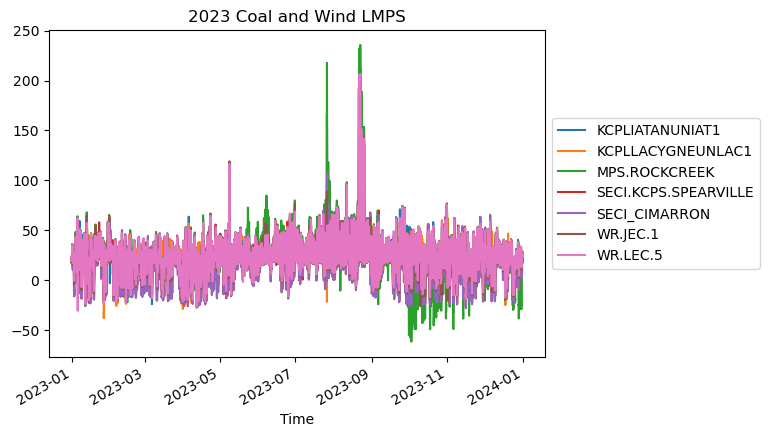

In [4]:
ax = df.plot()
ax.legend(loc = 'center left', bbox_to_anchor=(1, 0.5))
ax.set_title("2023 Coal and Wind LMPS")
plt.show()

What stands out immediedtly are the big price speaks in the summer, and the increase in negative price volatility in the fall
Additionally, there seems to be a general lift in prices from May through August. 

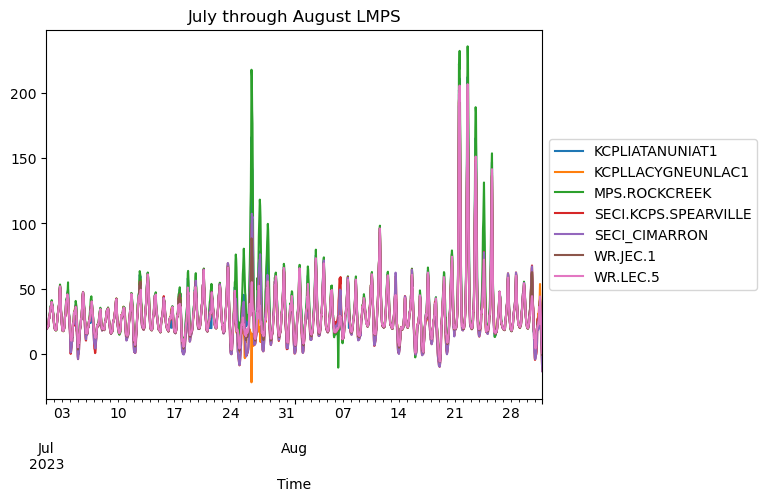

In [5]:
ax = df.loc["2023-07-01":"2023-08-31"].plot()
ax.legend(loc = 'center left', bbox_to_anchor=(1, 0.5))
ax.set_title("July through August LMPS")
plt.show()

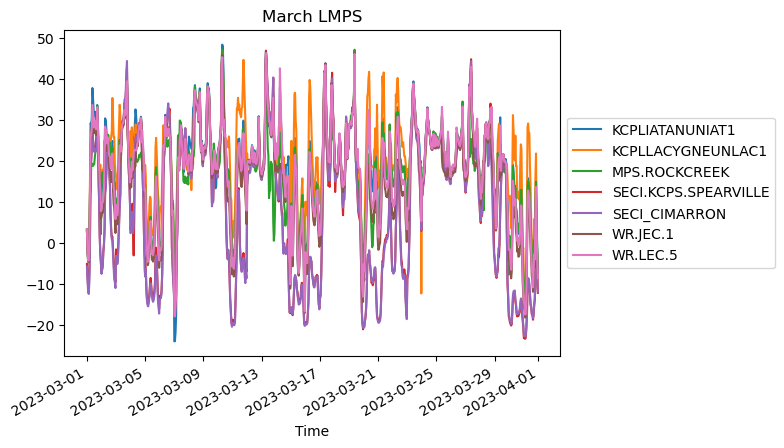

In [6]:
ax = df.loc["2023-03-01":"2023-03-31"].plot()
ax.legend(loc = 'center left', bbox_to_anchor=(1, 0.5))
ax.set_title("March LMPS")
plt.show()

In [7]:
coalgens = ["KCPLIATANUNIAT1", "KCPLLACYGNEUNLAC1", "WR.JEC.1", "WR.LEC.5"]
windgens = ["MPS.ROCKCREEK", "SECI.KCPS.SPEARVILLE", "SECI_CIMARRON"]

NameError: name 'axs' is not defined

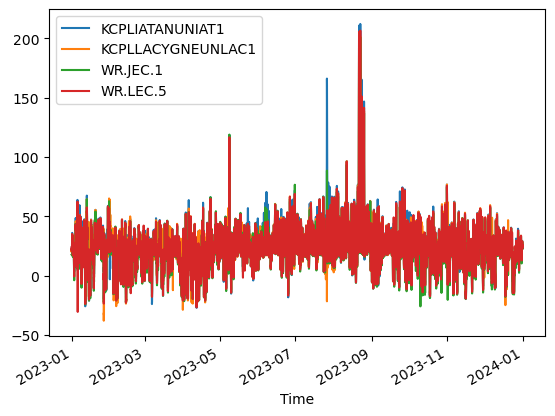

In [8]:
#TODO: probably a cleaner way to set up these graphs 
axs[0]=df[coalgens].plot()
axs[1]=df[windgens].plot()
axs[0].legend(loc = 'center left', bbox_to_anchor=(1, 0.5))
axs[0].set_title("Coal Gen LMPS")
axs[1].legend(loc = 'center left', bbox_to_anchor=(1, 0.5))
axs[1].set_title("Wind Gen LMPS")
plt.show()

With one year it is hard to tell if there is an overall trend in the prices
Seasonal-both the price level and the volatility in prices show seasonal patters


### Seasonal Plots

In [13]:
#Stack the months
df_month=df[["SECI_CIMARRON"]]
df_month['Month']= df_month.index.month
df_month['Hour']= df_month.index.hour
df_month.head()

C:\Users\U1231034\AppData\Local\Temp\ipykernel_27608\1425580363.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_month['Month']= df_month.index.month
C:\Users\U1231034\AppData\Local\Temp\ipykernel_27608\1425580363.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_month['Hour']= df_month.index.hour


,SECI_CIMARRON,Month,Hour
Time,,,
2023-01-01 00:00:00,17.3592,1,0
2023-01-01 01:00:00,17.1675,1,1
2023-01-01 02:00:00,18.5753,1,2
2023-01-01 03:00:00,18.0899,1,3
2023-01-01 04:00:00,18.7861,1,4


In [14]:
df_monthPV = df_month.pivot_table(values="SECI_CIMARRON", index = "Hour", columns = "Month")
df_monthPV.head()

Month,1,2,3,4,5,6,7,8,9,10,11,12
Hour,,,,,,,,,,,,
0,4.849500,2.660679,0.085094,-5.219303,6.681806,12.652047,12.763916,13.440645,1.087353,-2.172677,1.235950,4.740929
1,4.098432,1.974121,0.074600,-5.667437,6.370258,10.888997,11.604448,12.302532,0.463340,-3.182390,2.032913,3.863994
2,3.785090,2.177375,-0.123240,-6.229047,7.063274,10.052373,11.460252,12.292661,0.535407,-3.711597,2.439057,4.416929
3,3.969684,2.527036,0.893829,-5.013130,8.513065,10.227673,11.898665,12.479906,1.437663,-3.355603,3.720450,4.846652
4,5.910052,3.544811,2.814923,-3.747590,11.059845,11.123913,12.833545,13.681229,2.887077,-2.073003,5.606230,6.684761


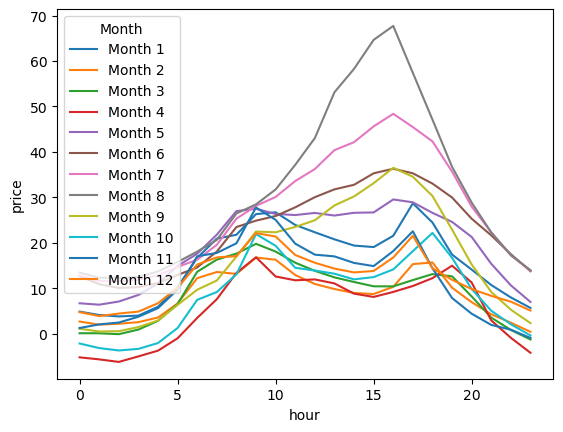

In [16]:
plt.figure()
for month in df_monthPV.columns:
        plt.plot(df_monthPV.index, df_monthPV[month], label = f'Month {month}')
plt.xlabel("hour")
plt.ylabel("price")
plt.legend(title = 'Month')
plt.show()

In [ ]:
#seasons vs day?
#Month vs day
#day of week
#day vs hour

In [54]:
#Month vs day
#Stack the months
df_MD=df[["SECI_CIMARRON"]]
df_MD['Month']= df_MD.index.month
df_MD['Day']= df_MD.index.day
df_MD = df_MD.pivot_table(values="SECI_CIMARRON", index = "Day", columns = "Month")
df_MD.head()

C:\Users\U1231034\AppData\Local\Temp\ipykernel_27608\305126854.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_MD['Month']= df_MD.index.month
C:\Users\U1231034\AppData\Local\Temp\ipykernel_27608\305126854.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_MD['Day']= df_MD.index.day


Month,1,2,3,4,5,6,7,8,9,10,11,12
Day,,,,,,,,,,,,
1,22.565242,33.749762,11.438233,5.668354,28.415408,14.911537,27.999225,25.543429,11.103962,-11.469258,-0.275092,24.306575
2,12.748325,25.304971,4.813125,-6.745050,25.196871,17.070867,29.361654,22.346613,15.204371,-6.707062,10.808488,21.191571
3,5.126375,13.653104,18.969046,4.261792,20.334512,25.487429,28.403092,31.267788,13.883488,-13.016875,8.201571,4.295608
4,25.969017,-2.643021,16.386450,-16.227958,14.722929,24.479829,14.307096,34.098325,-0.705733,22.603500,28.678458,19.071125
5,24.443608,15.961617,-11.661475,1.347183,25.867350,26.696333,23.854358,27.772183,15.021642,21.680783,7.760420,23.153900


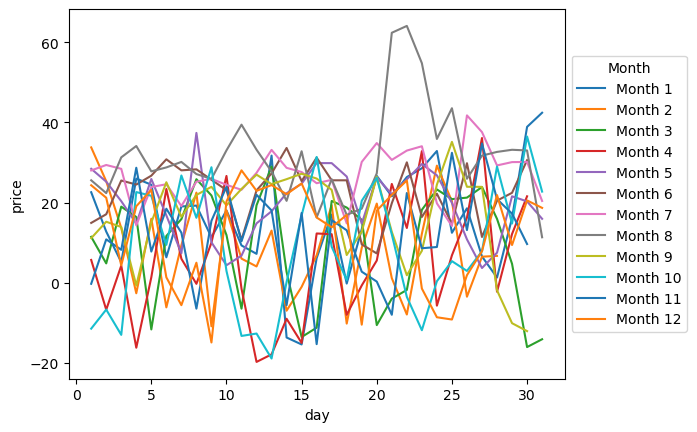

In [56]:
plt.figure()
for month in df_MD.columns:
        plt.plot(df_MD.index, df_MD[month], label = f'Month {month}')
plt.xlabel("day")
plt.ylabel("price")
plt.legend(loc = 'center left', bbox_to_anchor=(1, 0.5),title = 'Month')
plt.show()

In [61]:
df_DoW=df[["SECI_CIMARRON"]]
df_DoW['Month']= df_DoW.index.month
df_DoW['DayOfWeek']= df_DoW.index.dayofweek
df_DoW = df_DoW.pivot_table(values="SECI_CIMARRON", index = "DayOfWeek", columns = "Month")
df_DoW.head()

C:\Users\U1231034\AppData\Local\Temp\ipykernel_27608\2702571469.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_DoW['Month']= df_DoW.index.month
C:\Users\U1231034\AppData\Local\Temp\ipykernel_27608\2702571469.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_DoW['DayOfWeek']= df_DoW.index.dayofweek


Month,1,2,3,4,5,6,7,8,9,10,11,12
DayOfWeek,,,,,,,,,,,,
0,19.525709,8.262360,13.478635,9.313847,27.560113,22.269570,23.729702,36.378754,16.177523,15.613613,17.865170,13.704127
1,23.080902,2.538425,7.619282,-4.728739,22.994566,19.183866,16.604404,36.528221,19.657917,4.391882,4.929147,9.366925
2,11.871725,11.808221,5.315402,-0.722017,19.443626,25.480080,30.776891,30.456629,24.993559,3.840771,10.047302,12.872085
3,15.884879,8.365684,3.492118,11.777669,16.962804,24.195873,32.523529,27.455047,13.256765,8.085875,5.827877,15.059061
4,17.803349,20.055267,12.080059,4.835984,16.551638,24.179160,26.913277,33.486962,10.382774,6.125633,14.159147,17.788940


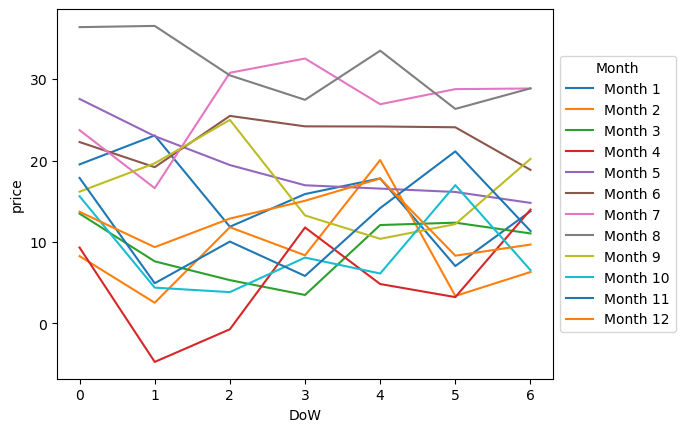

In [62]:
plt.figure()
for month in df_DoW.columns:
        plt.plot(df_DoW.index, df_DoW[month], label = f'Month {month}')
plt.xlabel("DoW")
plt.ylabel("price")
plt.legend(loc = 'center left', bbox_to_anchor=(1, 0.5),title = 'Month')
plt.show()

In [68]:
df_Cim=df[["SECI_CIMARRON"]]
df_Cim['DayOfWeek']= df_Cim.index.dayofweek

C:\Users\U1231034\AppData\Local\Temp\ipykernel_27608\1904789447.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Cim['DayOfWeek']= df_Cim.index.dayofweek


In [69]:
df_Cim.head()

,SECI_CIMARRON,DayOfWeek
Time,,
2023-01-01 00:00:00,17.3592,6
2023-01-01 01:00:00,17.1675,6
2023-01-01 02:00:00,18.5753,6
2023-01-01 03:00:00,18.0899,6
2023-01-01 04:00:00,18.7861,6


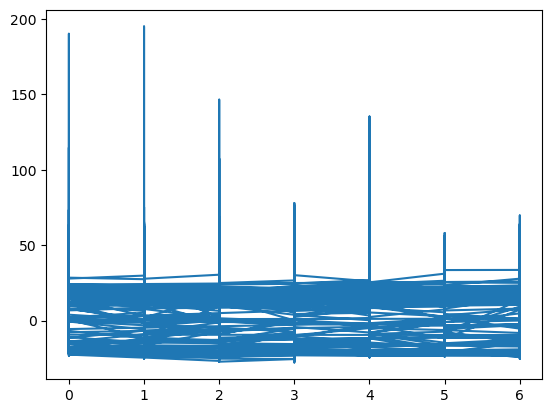

In [71]:
plt.figure()
plt.plot(df_Cim['DayOfWeek'], df['SECI_CIMARRON'])
plt.show()

In [72]:
avg_prices =df_Cim.groupby('DayOfWeek')['SECI_CIMARRON'].mean()

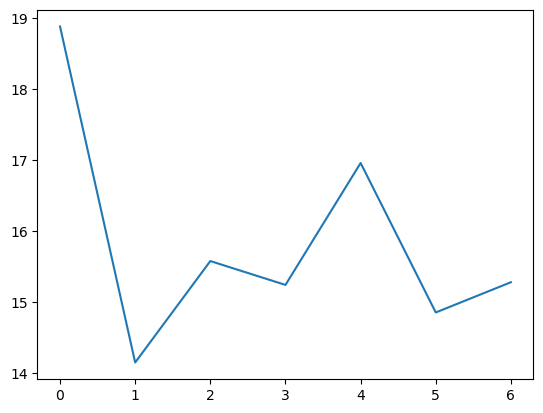

In [73]:
plt.figure()
plt.plot(avg_prices.index, avg_prices.values)
plt.show()

In [7]:
#x: day of week, labe: week
weekdf=df[["SECI_CIMARRON"]]
weekdf['DayOfWeek']=weekdf.index.day_name()
weekdf['TimeOfDay']=weekdf.index.time
weekdf['WekOfYear']= weekdf.index.isocalendar().week

C:\Users\U1231034\AppData\Local\Temp\ipykernel_772\1730217848.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weekdf['DayOfWeek']=weekdf.index.day_name()
C:\Users\U1231034\AppData\Local\Temp\ipykernel_772\1730217848.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weekdf['TimeOfDay']=weekdf.index.time
C:\Users\U1231034\AppData\Local\Temp\ipykernel_772\1730217848.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

In [9]:
weekdf.head()

,SECI_CIMARRON,DayOfWeek,TimeOfDay,WekOfYear
Time,,,,
2023-01-01 00:00:00,17.3592,Sunday,00:00:00,52
2023-01-01 01:00:00,17.1675,Sunday,01:00:00,52
2023-01-01 02:00:00,18.5753,Sunday,02:00:00,52
2023-01-01 03:00:00,18.0899,Sunday,03:00:00,52
2023-01-01 04:00:00,18.7861,Sunday,04:00:00,52


In [10]:
weekdf['DayTime']= df.index.strftime('%A %H:%M')

C:\Users\U1231034\AppData\Local\Temp\ipykernel_772\1386307098.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weekdf['DayTime']= df.index.strftime('%A %H:%M')


In [13]:
weekdf.head(30)

,SECI_CIMARRON,DayOfWeek,TimeOfDay,WekOfYear,DayTime
Time,,,,,
2023-01-01 00:00:00,17.3592,Sunday,00:00:00,52,Sunday 00:00
2023-01-01 01:00:00,17.1675,Sunday,01:00:00,52,Sunday 01:00
2023-01-01 02:00:00,18.5753,Sunday,02:00:00,52,Sunday 02:00
2023-01-01 03:00:00,18.0899,Sunday,03:00:00,52,Sunday 03:00
2023-01-01 04:00:00,18.7861,Sunday,04:00:00,52,Sunday 04:00
2023-01-01 05:00:00,18.8083,Sunday,05:00:00,52,Sunday 05:00
2023-01-01 06:00:00,19.9549,Sunday,06:00:00,52,Sunday 06:00
2023-01-01 07:00:00,21.8562,Sunday,07:00:00,52,Sunday 07:00
2023-01-01 08:00:00,23.5560,Sunday,08:00:00,52,Sunday 08:00


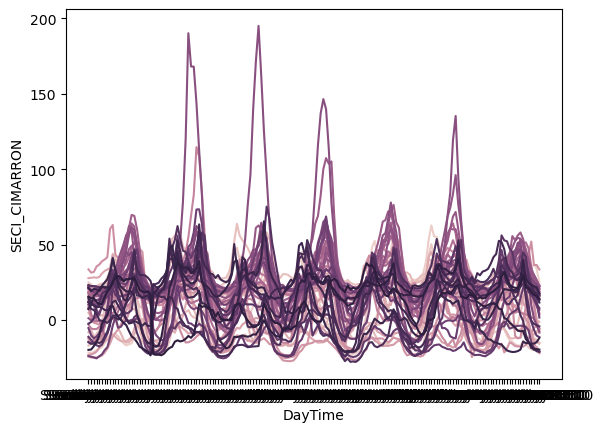

In [26]:
plt.figure()
sns.lineplot(data=weekdf, x='DayTime', y='SECI_CIMARRON', hue='WekOfYear', errorbar=None, legend=False)
locs, labels = plt.xticks()  # Get the current locations and labels.
plt.show()

In [27]:
locs

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167]

ConversionError: Failed to convert value(s) to axis units: DatetimeIndex(['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04',
               '2023-01-05', '2023-01-06', '2023-01-07'],
              dtype='datetime64[ns]', freq=None)

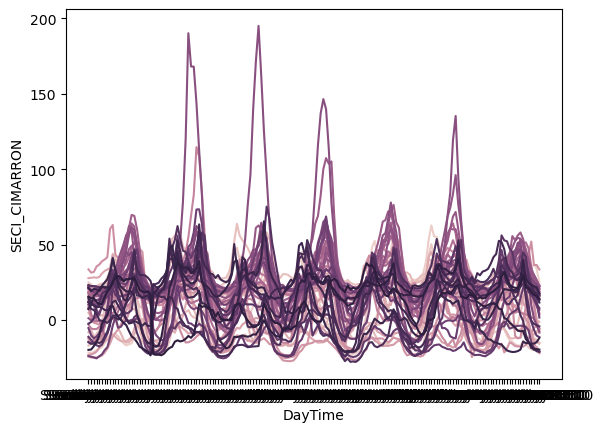

In [19]:
plt.figure()
sns.lineplot(data=weekdf, x='DayTime', y='SECI_CIMARRON', hue='WekOfYear', errorbar=None, legend=False)
unique_days=weekdf['DayOfWeek'].unique()
plt.xticks(ticks=pd.to_datetime([weekdf[weekdf['DayOfWeek']==day].index[0] for day in unique_days]), labels=unique_days)
plt.show()

In [20]:
ticks=pd.to_datetime([weekdf[weekdf['DayOfWeek']==day].index[0] for day in unique_days])

In [21]:
ticks

DatetimeIndex(['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04',
               '2023-01-05', '2023-01-06', '2023-01-07'],
              dtype='datetime64[ns]', freq=None)